In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [2]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
dblock = DataBlock()

In [4]:
dsets = dblock.datasets(df)

In [5]:
dsets.train[0]

(fname       001980.jpg
 labels      person car
 is_valid         False
 Name: 979, dtype: object,
 fname       001980.jpg
 labels      person car
 is_valid         False
 Name: 979, dtype: object)

In [6]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('002055.jpg', 'dog person sofa')

In [7]:
def get_x(r): return r['fname']
def get_y(r): return r['labels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('007687.jpg', 'dog person')

In [9]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/root/.fastai/data/pascal_2007/train/001855.jpg'), ['bird'])

In [10]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
 get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x375,
 TensorMultiCategory([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [11]:
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#1) ['bicycle']

In [12]:
def splitter(df):
 train = df.index[~df['is_valid']].tolist()
 valid = df.index[df['is_valid']].tolist()
 return train,valid
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
 splitter=splitter,
 get_x=get_x,
 get_y=get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [13]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
 splitter=splitter,
 get_x=get_x,
 get_y=get_y,
 item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

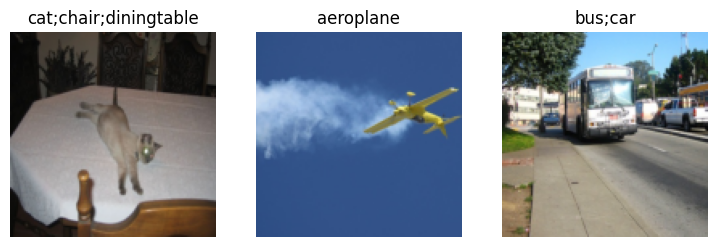

In [14]:
dls.show_batch(nrows=1, ncols=3)